<a href="https://colab.research.google.com/github/Pedro070703/TrabTitanic/blob/main/TrabTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import math
import sklearn
from scipy.stats import normaltest


import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.shape, test.shape

((891, 12), (418, 11))

In [4]:
def show_countplot(column, figsize=(9, 6)):
    plt.figure(figsize=figsize)
    sns.countplot(x=column, data=df)
    plt.show()

def show_percentplot(column, figsize=(9, 6)):
    counts = df[column].value_counts()
    percentages = counts / counts.sum() * 100

    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x=percentages.index, y=percentages.values, ax=ax)
    ax.set_ylim([0, 100])
    ax.set_yticks(np.linspace(0, 100, 11))
    ax.yaxis.set_major_formatter(lambda y, _: '{:.0%}'.format(y/100))

    plt.show()

def show_catplot(column: str, targer: str, title: str = None, figsize = (9, 6)):
    plt.figure(figsize=figsize)
    sns.catplot(x=column, y=targer, data=df, kind="bar")
    plt.title(title)

    plt.show()

def show_histplot(column: str, bins: int = None, title: str = None, figsize = (9, 6)):
    plt.figure(figsize=figsize)
    sns.histplot(data=df, x=column, bins=bins, kde=True)
    plt.title(title)
    plt.xlabel(column)
    plt.show()

def show_kdeplot(column: str, title: str = None, figsize = (9, 6)):
    plt.figure(figsize=figsize)
    sns.kdeplot(data=df, x=column)
    plt.title(title)
    plt.show()

def show_boxplot(column: str, title: str = None, figsize = (9, 6)):
    plt.figure(figsize=figsize)
    sns.boxplot(data=df, x=column)
    plt.title(title)
    plt.xlabel(column)
    plt.show()

In [5]:
df = train

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_embarked)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.Fare = test.groupby(['Embarked', 'Pclass'])['Fare'].apply(lambda x: x.fillna(x.median()))
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<ipython-input-9-5421c5d4bfad>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  test.Fare = test.groupby(['Embarked', 'Pclass'])['Fare'].apply(lambda x: x.fillna(x.median()))


In [10]:
def get_title(name):
    index = name.index(',') + 1
    return name[index:].split()[0][:-1]

df['Title'] = df.Name.apply(get_title)
test['Title'] = test.Name.apply(get_title)
df.Title.value_counts()

titleMap = {
    'Col': 'Officer',
    'Major': 'Officer',
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Dona': 'Mrs',
    'th': 'Mrs',
    'Don': 'Mr',
    'Capt': 'Officer',
    'Lady': 'Miss',
    'Sir': 'Mr',
    'Jonkheer': 'Mr'
}

df.Title = df.Title.replace(titleMap)
df.Title = df.Title.astype('object')

test.Title = test.Title.replace(titleMap)
test.Title = test.Title.astype('object')
df.Title.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Title
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [11]:
df['TicketFrequency'] = df.groupby('Ticket')['Ticket'].transform('count')

In [12]:
def min_max_scale(x):
    return (x - x.min()) / (x.max() - x.min()) * 100
df['Fare_scaled'] = df.groupby('Embarked')['Fare'].transform(min_max_scale)
test['Fare_scaled'] = test.groupby('Embarked')['Fare'].transform(min_max_scale)
df['Fare_scaled'].describe()

count    891.000000
mean      10.262942
std       14.559878
min        0.000000
25%        2.990342
50%        4.942966
75%       11.156119
max      100.000000
Name: Fare_scaled, dtype: float64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

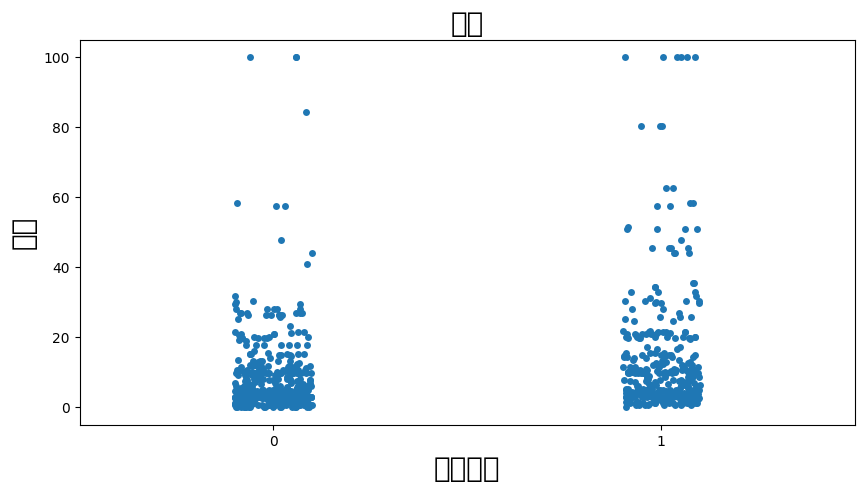

In [13]:
plt.figure(figsize = (10,5))
plt.title('나이',fontsize = 20)
sns.stripplot(x = 'Survived', y = 'Fare_scaled', data = df, jitter = True)
plt.xlabel('생존여부', fontsize = 20)
plt.ylabel('나이', fontsize = 20)


plt.show()

<Figure size 900x600 with 0 Axes>

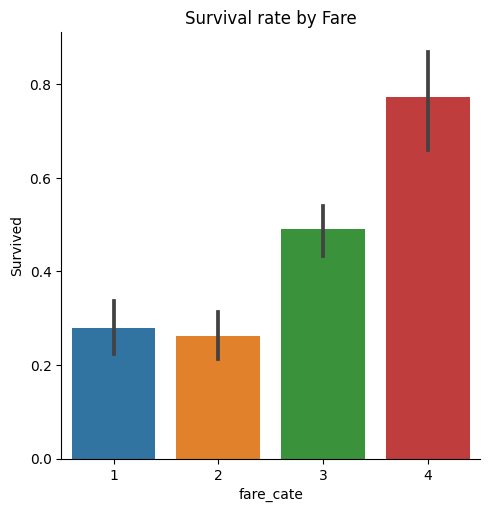

In [14]:
def Fare_Categorize(fare):
    if fare < 3:
        return 1
    elif fare < 6:
        return 2
    elif fare < 30:
        return 3
    else:
        return 4
df['fare_cate'] = df['Fare_scaled'].apply(Fare_Categorize)
test['fare_cate'] = test['Fare_scaled'].apply(Fare_Categorize)
show_catplot('fare_cate', 'Survived', 'Survival rate by Fare')

In [15]:
corr_df = df.copy()
for column in corr_df.columns:
    if corr_df[column].dtype == 'object':
        corr_df[column] = corr_df[column].astype('category').cat.codes

corr_df.corr()['Cabin'].map(lambda x: abs(x)).sort_values(ascending=False)

Cabin              1.000000
Pclass             0.537419
fare_cate          0.348329
Fare_scaled        0.324458
Fare               0.310987
Survived           0.276235
Ticket             0.176515
Age                0.167432
Sex                0.137704
Embarked           0.070046
Parch              0.033585
SibSp              0.024829
TicketFrequency    0.019349
Title              0.012084
Name               0.003122
PassengerId        0.000637
Name: Cabin, dtype: float64

In [16]:
df['Deck'] = df['Cabin'].dropna().map(lambda cabin: cabin[0])
test['Deck'] = test['Cabin'].dropna().map(lambda cabin: cabin[0])
df['Deck']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Deck, Length: 891, dtype: object

In [17]:
corr_df = df.copy()
for column in corr_df.columns:
    if corr_df[column].dtype == 'object':
        corr_df[column] = corr_df[column].astype('category').cat.codes

corr_df.corr()['Deck'].map(lambda x: abs(x)).sort_values(ascending=False)

Deck               1.000000
Cabin              0.985656
Pclass             0.570691
fare_cate          0.365053
Fare_scaled        0.344957
Fare               0.337525
Survived           0.287944
Ticket             0.196462
Age                0.179643
Sex                0.143517
Embarked           0.080523
Parch              0.037621
SibSp              0.031973
Title              0.019526
TicketFrequency    0.014937
Name               0.001737
PassengerId        0.000483
Name: Deck, dtype: float64

In [18]:
mode_Deck = df.loc[df[['Pclass', 'fare_cate', 'Deck']].notna().all(axis=1)]
# ['Deck'].mode()[0]
mode_Deck

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,TicketFrequency,Fare_scaled,fare_cate,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,13.234033,3,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,20.190114,3,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,1,19.719582,3,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Miss,2,6.349810,3,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Miss,1,10.095057,3,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,Mrs,2,19.982586,3,D
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,Mr,1,1.901141,1,B
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,Mrs,2,15.570175,3,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1,11.406844,3,B


In [19]:
mode_Deck = mode_Deck.groupby(['Pclass', 'fare_cate'])['Deck'].apply(lambda x: x.mode()[0]).reset_index()
mode_Deck = mode_Deck[['Pclass', 'fare_cate', 'Deck']]
mode_Deck

,Pclass,fare_cate,Deck
0,1,1,B
1,1,2,C
2,1,3,C
3,1,4,C
4,2,1,D
5,2,2,E
6,2,3,F
7,3,1,F
8,3,2,E
9,3,3,G


<Figure size 900x600 with 0 Axes>

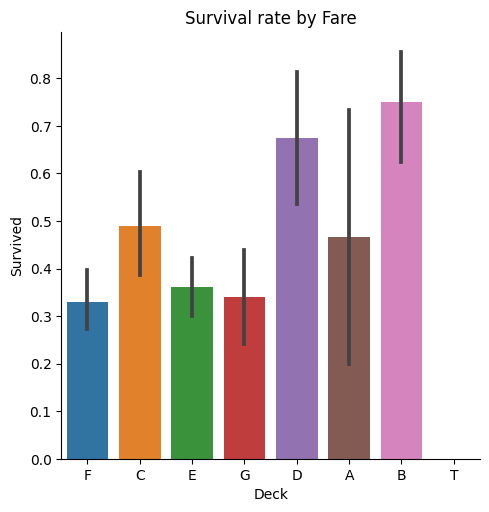

In [20]:
missing_deck = df[df['Deck'].isnull()]
missing_deck_test = test[test['Deck'].isnull()]
filled_deck = pd.merge(missing_deck, mode_Deck, on=['Pclass', 'fare_cate'], how='left')


df.loc[df['Deck'].isnull(), 'Deck'] = filled_deck['Deck_y']
test.loc[test['Deck'].isnull(), 'Deck'] = filled_deck['Deck_y']
show_catplot('Deck', 'Survived', 'Survival rate by Fare')

<Figure size 900x600 with 0 Axes>

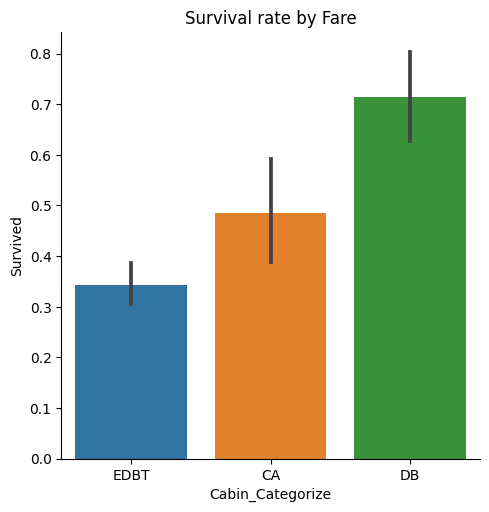

In [21]:
def Cabin_Categorize(cabin):
    if (cabin == "E") |(cabin == "G")|(cabin == "F")|(cabin == "T"):
        return "EDBT"
    elif (cabin == "C") |(cabin == "A"):
        return "CA"
    elif (cabin == "D") |(cabin == "B"):
        return "DB"

df['Cabin_Categorize'] = df['Deck'].apply(Cabin_Categorize)
test['Cabin_Categorize'] = test['Deck'].apply(Cabin_Categorize)
show_catplot('Cabin_Categorize', 'Survived', 'Survival rate by Fare')

<Figure size 900x600 with 0 Axes>

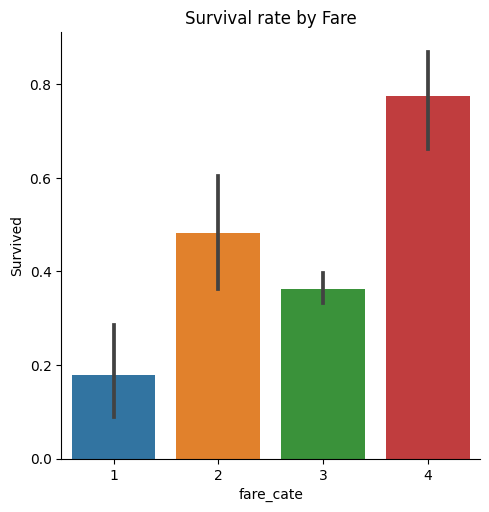

In [22]:
def Fare_Categorize(fare):
    if fare < 1:
        return 1
    elif fare < 2:
        return 2
    elif fare < 30:
        return 3
    else:
        return 4
df['fare_cate'] = df['Fare_scaled'].apply(Fare_Categorize)
test['fare_cate'] = test['Fare_scaled'].apply(Fare_Categorize)
show_catplot('fare_cate', 'Survived', 'Survival rate by Fare')

In [23]:
def Age_Categorize(age):
    if age < 16:
        return 1
    elif (age >= 16) & (age < 65):
        return 2
    else:
        return 3
df['Age2'] = df['Age']
test['Age2'] = test['Age']
df.Age2 = df.groupby(['Title', 'Pclass'])['Age2'].apply(lambda x: x.fillna(x.median()))
test.Age2 = test.groupby(['Title', 'Pclass'])['Age2'].apply(lambda x: x.fillna(x.median()))
df['age_cate'] = df['Age2'].apply(Age_Categorize)
test['age_cate'] = test['Age2'].apply(Age_Categorize)

<ipython-input-23-28269396e8ef>:10: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df.Age2 = df.groupby(['Title', 'Pclass'])['Age2'].apply(lambda x: x.fillna(x.median()))
<ipython-input-23-28269396e8ef>:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  test.Age2 = test.groupby(['Title', 'Pclass']

<Figure size 900x600 with 0 Axes>

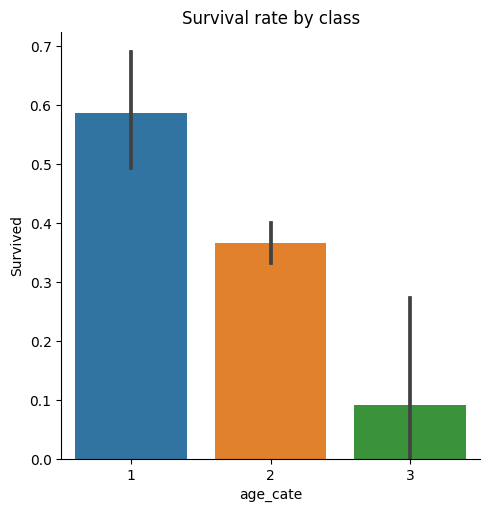

In [24]:
show_catplot('age_cate', 'Survived', 'Survival rate by class')

<Figure size 900x600 with 0 Axes>

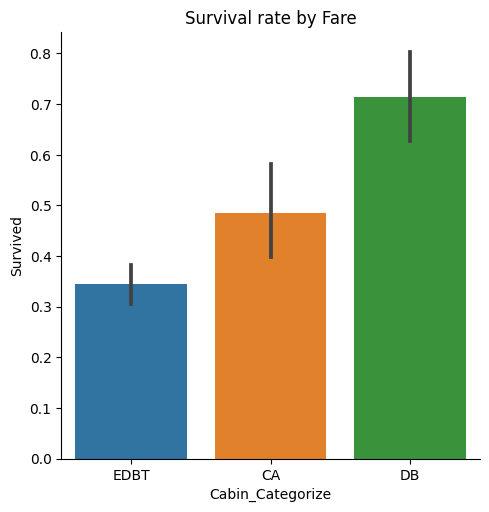

In [25]:
show_catplot('Cabin_Categorize', 'Survived', 'Survival rate by Fare')

In [26]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title',
       'TicketFrequency', 'Fare_scaled', 'fare_cate', 'Deck',
       'Cabin_Categorize', 'Age2', 'age_cate'],
      dtype='object')

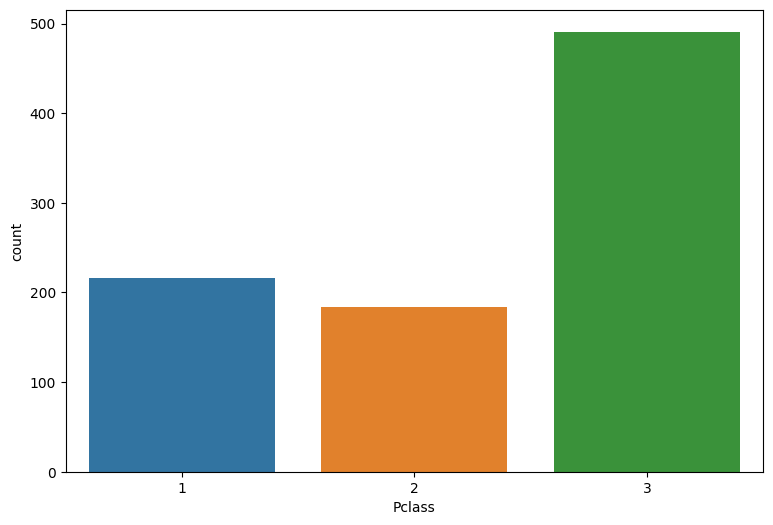

In [27]:
df.Pclass = df.Pclass.astype('int')
show_countplot('Pclass')

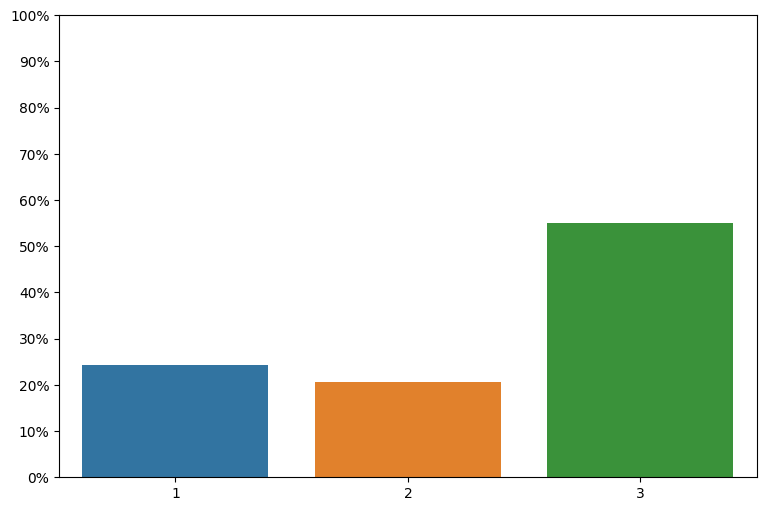

In [28]:
show_percentplot('Pclass')

<Figure size 900x600 with 0 Axes>

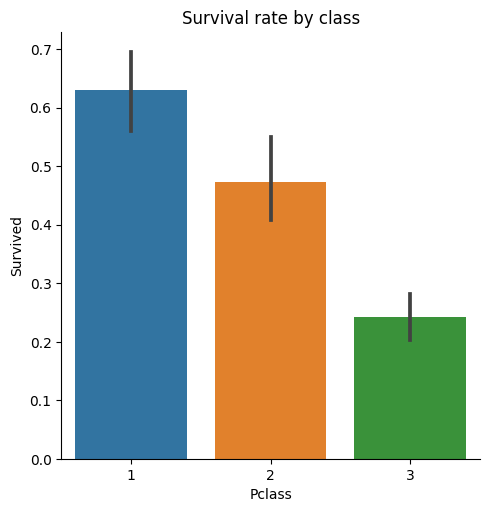

In [29]:
df.groupby('Pclass')['Survived'].mean() * 100
show_catplot('Pclass', 'Survived', 'Survival rate by class')

<Figure size 900x600 with 0 Axes>

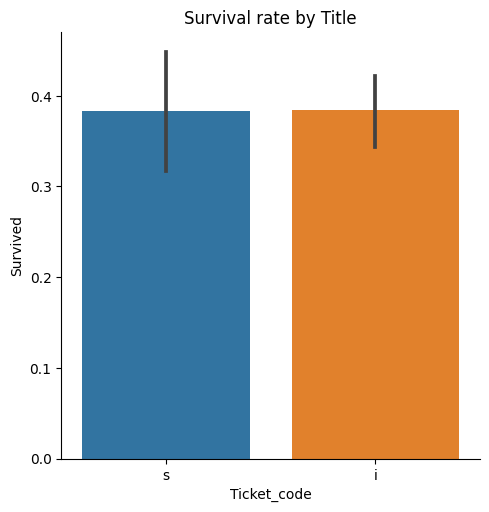

In [30]:
df['Ticket_code'] = df["Ticket"][0]


for index, row in df.iterrows():
    first_char = row['Ticket'][0]
    if not first_char.isdigit():
        df.at[index, 'Ticket_code'] = 's'
    else:
        df.at[index, 'Ticket_code'] = 'i'
df['Ticket_code']
show_catplot('Ticket_code', 'Survived', 'Survival rate by Title')

<Figure size 900x600 with 0 Axes>

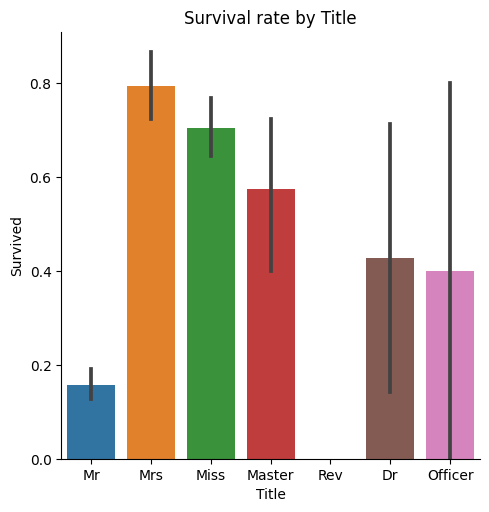

In [31]:
show_catplot('Title', 'Survived', 'Survival rate by Title')

In [32]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Title,TicketFrequency,Fare_scaled,fare_cate,Deck,Cabin_Categorize,Age2,age_cate,Ticket_code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,Mr,1,2.756654,3,F,EDBT,22.0,2,s
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,Mrs,1,13.234033,3,C,CA,38.0,2,s
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,Miss,1,3.013308,3,E,EDBT,26.0,2,s
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,Mrs,2,20.190114,3,C,CA,35.0,2,i
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,Mr,1,3.060837,3,G,EDBT,35.0,2,i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,S,Rev,1,4.942966,3,NaN,None,27.0,2,i
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,S,Miss,1,11.406844,3,B,DB,19.0,2,i
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,S,Miss,2,8.916350,3,NaN,None,18.0,2,s
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,C,Mr,1,5.112462,3,C,CA,26.0,2,i


In [33]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title',
       'TicketFrequency', 'Fare_scaled', 'fare_cate', 'Deck',
       'Cabin_Categorize', 'Age2', 'age_cate', 'Ticket_code'],
      dtype='object')

In [35]:
import xgboost as xgb
import lightgbm as lgb

from sklearn.base import BaseEstimator
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV


y = df["Survived"]

features = ["Sex", "age_cate", "fare_cate", 'Cabin_Categorize', 'SibSp', 'Pclass']
X = pd.get_dummies(df[features], dummy_na=True)
X_test = pd.get_dummies(test[features], dummy_na=True)

model = lgb.LGBMClassifier(
    n_estimators=75,
    max_depth=3,
    learning_rate=0.01,
    subsample=0.8,
    random_state=1
)

model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [36]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title',
       'TicketFrequency', 'Fare_scaled', 'fare_cate', 'Deck',
       'Cabin_Categorize', 'Age2', 'age_cate', 'Ticket_code'],
      dtype='object')

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping


y = df["Survived"]
features = ["Sex", "age_cate","fare_cate",'Cabin_Categorize','SibSp',
        'Pclass']
X = pd.get_dummies(df[features], dummy_na=True)
X_test = pd.get_dummies(test[features], dummy_na=True)



X = np.array(X).reshape(X.shape[0], X.shape[1], 1)
y = np.array(y)




model = Sequential()
model.add(LSTM(16, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(X, y, epochs=100, batch_size = 16, verbose = 1)


X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
predictions = y_pred.tolist()

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output['Survived'] = output['Survived'].apply(lambda x: x[0] if isinstance(x, list) else x)
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Epoch 1/100
56/56 [==============================] - 5s 7ms/step - loss: 0.6714 - accuracy: 0.6173
Epoch 2/100
56/56 [==============================] - 0s 7ms/step - loss: 0.6597 - accuracy: 0.6162
Epoch 3/100
56/56 [==============================] - 0s 6ms/step - loss: 0.6588 - accuracy: 0.6162
Epoch 4/100
56/56 [==============================] - 0s 7ms/step - loss: 0.6579 - accuracy: 0.6162
Epoch 5/100
56/56 [==============================] - 1s 14ms/step - loss: 0.6560 - accuracy: 0.6162
Epoch 6/100
56/56 [==============================] - 1s 14ms/step - loss: 0.6540 - accuracy: 0.6162
Epoch 7/100
56/56 [==============================] - 1s 10ms/step - loss: 0.6510 - accuracy: 0.6162
Epoch 8/100
56/56 [==============================] - 1s 9ms/step - loss: 0.6501 - accuracy: 0.6162
Epoch 9/100
56/56 [==============================] - 1s 9ms/step - loss: 0.6450 - accuracy: 0.6162
Epoch 10/100
56/56 [==============================] - 1s 10ms/step - loss: 0.6407 - accuracy: 0.6162
Epoch

In [38]:
output['Survived']

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64